## Pair Nulos

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# cargamos el dataframe creado en la lección anterior
df = pd.read_csv("world_data_full_apply.csv", index_col = 0)
df.head()

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe
2,Algeria,18.0,DZ,17.4,NaN,317.0,24.28,213.0,Algiers,150.006,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,NaN,41.2,37.2,66.1,11.70,NaN,28.033886,1.659626,Africa
3,Andorra,164.0,AD,40.0,468.000,NaN,7.20,376.0,Andorra la Vella,469.000,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77.142,NaN,NaN,NaN,NaN,67.873,42.506285,1.521801,Europe
4,Angola,26.0,AO,47.5,NaN,117.0,40.73,244.0,Luanda,34.693,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,NaN,77.5,9.2,49.1,6.89,NaN,-11.202692,17.873887,Africa


In [4]:
# 1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

country                                  0.000000
density                                  0.000000
abbreviation                             3.589744
agricultural_land                        3.589744
land_area                               15.384615
armed_forces_size                       14.871795
birth_rate                               3.076923
calling_code                             0.512821
capital/major_city                       1.538462
co2-emissions                            6.153846
cpi                                     10.256410
cpi_change                               8.205128
currency-code                            7.692308
fertility_rate                           3.589744
forested_area                            3.589744
gasoline_price                          10.256410
gdp                                      1.025641
gross_primary_education_enrollment       3.589744
gross_tertiary_education_enrollment      6.153846
infant_mortality                         3.076923


In [5]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agricultural_land,3.589744
land_area,15.384615
armed_forces_size,14.871795
birth_rate,3.076923
calling_code,0.512821
capital/major_city,1.538462
co2-emissions,6.153846
cpi,10.256410
cpi_change,8.205128


In [6]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [7]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJOR_CITY


capital/major_city
Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGEST_CITY


largest_city
S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIAL_LANGUAGE


official_language
English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna CONTINENT


continent
Africa             0.271795
Europe             0.241026
Asia               0.230769
Central America    0.102564
Oceania            0.071795
South America      0.066667
North America      0.010256
Name: count, dtype: float64

........................


In [8]:
columnas_desconocido = ['abbreviation', 'capital/major_city', 'currency-code', 'largest_city','official_language', 'continent']

In [9]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation          0
capital/major_city    0
currency-code         0
largest_city          0
official_language     0
continent             0
dtype: int64

In [10]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [11]:
# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]

agricultural_land                       0.035897
land_area                               0.153846
armed_forces_size                       0.148718
birth_rate                              0.030769
calling_code                            0.005128
co2-emissions                           0.061538
cpi                                     0.102564
cpi_change                              0.082051
fertility_rate                          0.035897
forested_area                           0.035897
gasoline_price                          0.102564
gdp                                     0.010256
gross_primary_education_enrollment      0.035897
gross_tertiary_education_enrollment     0.061538
infant_mortality                        0.030769
life_expectancy                         0.041026
maternal_mortality_ratio                0.071795
minimum_wage                            0.230769
out_of_pocket_health_expenditure        0.035897
physicians_per_thousand                 0.035897
population          

IndexError: unsupported iterator index

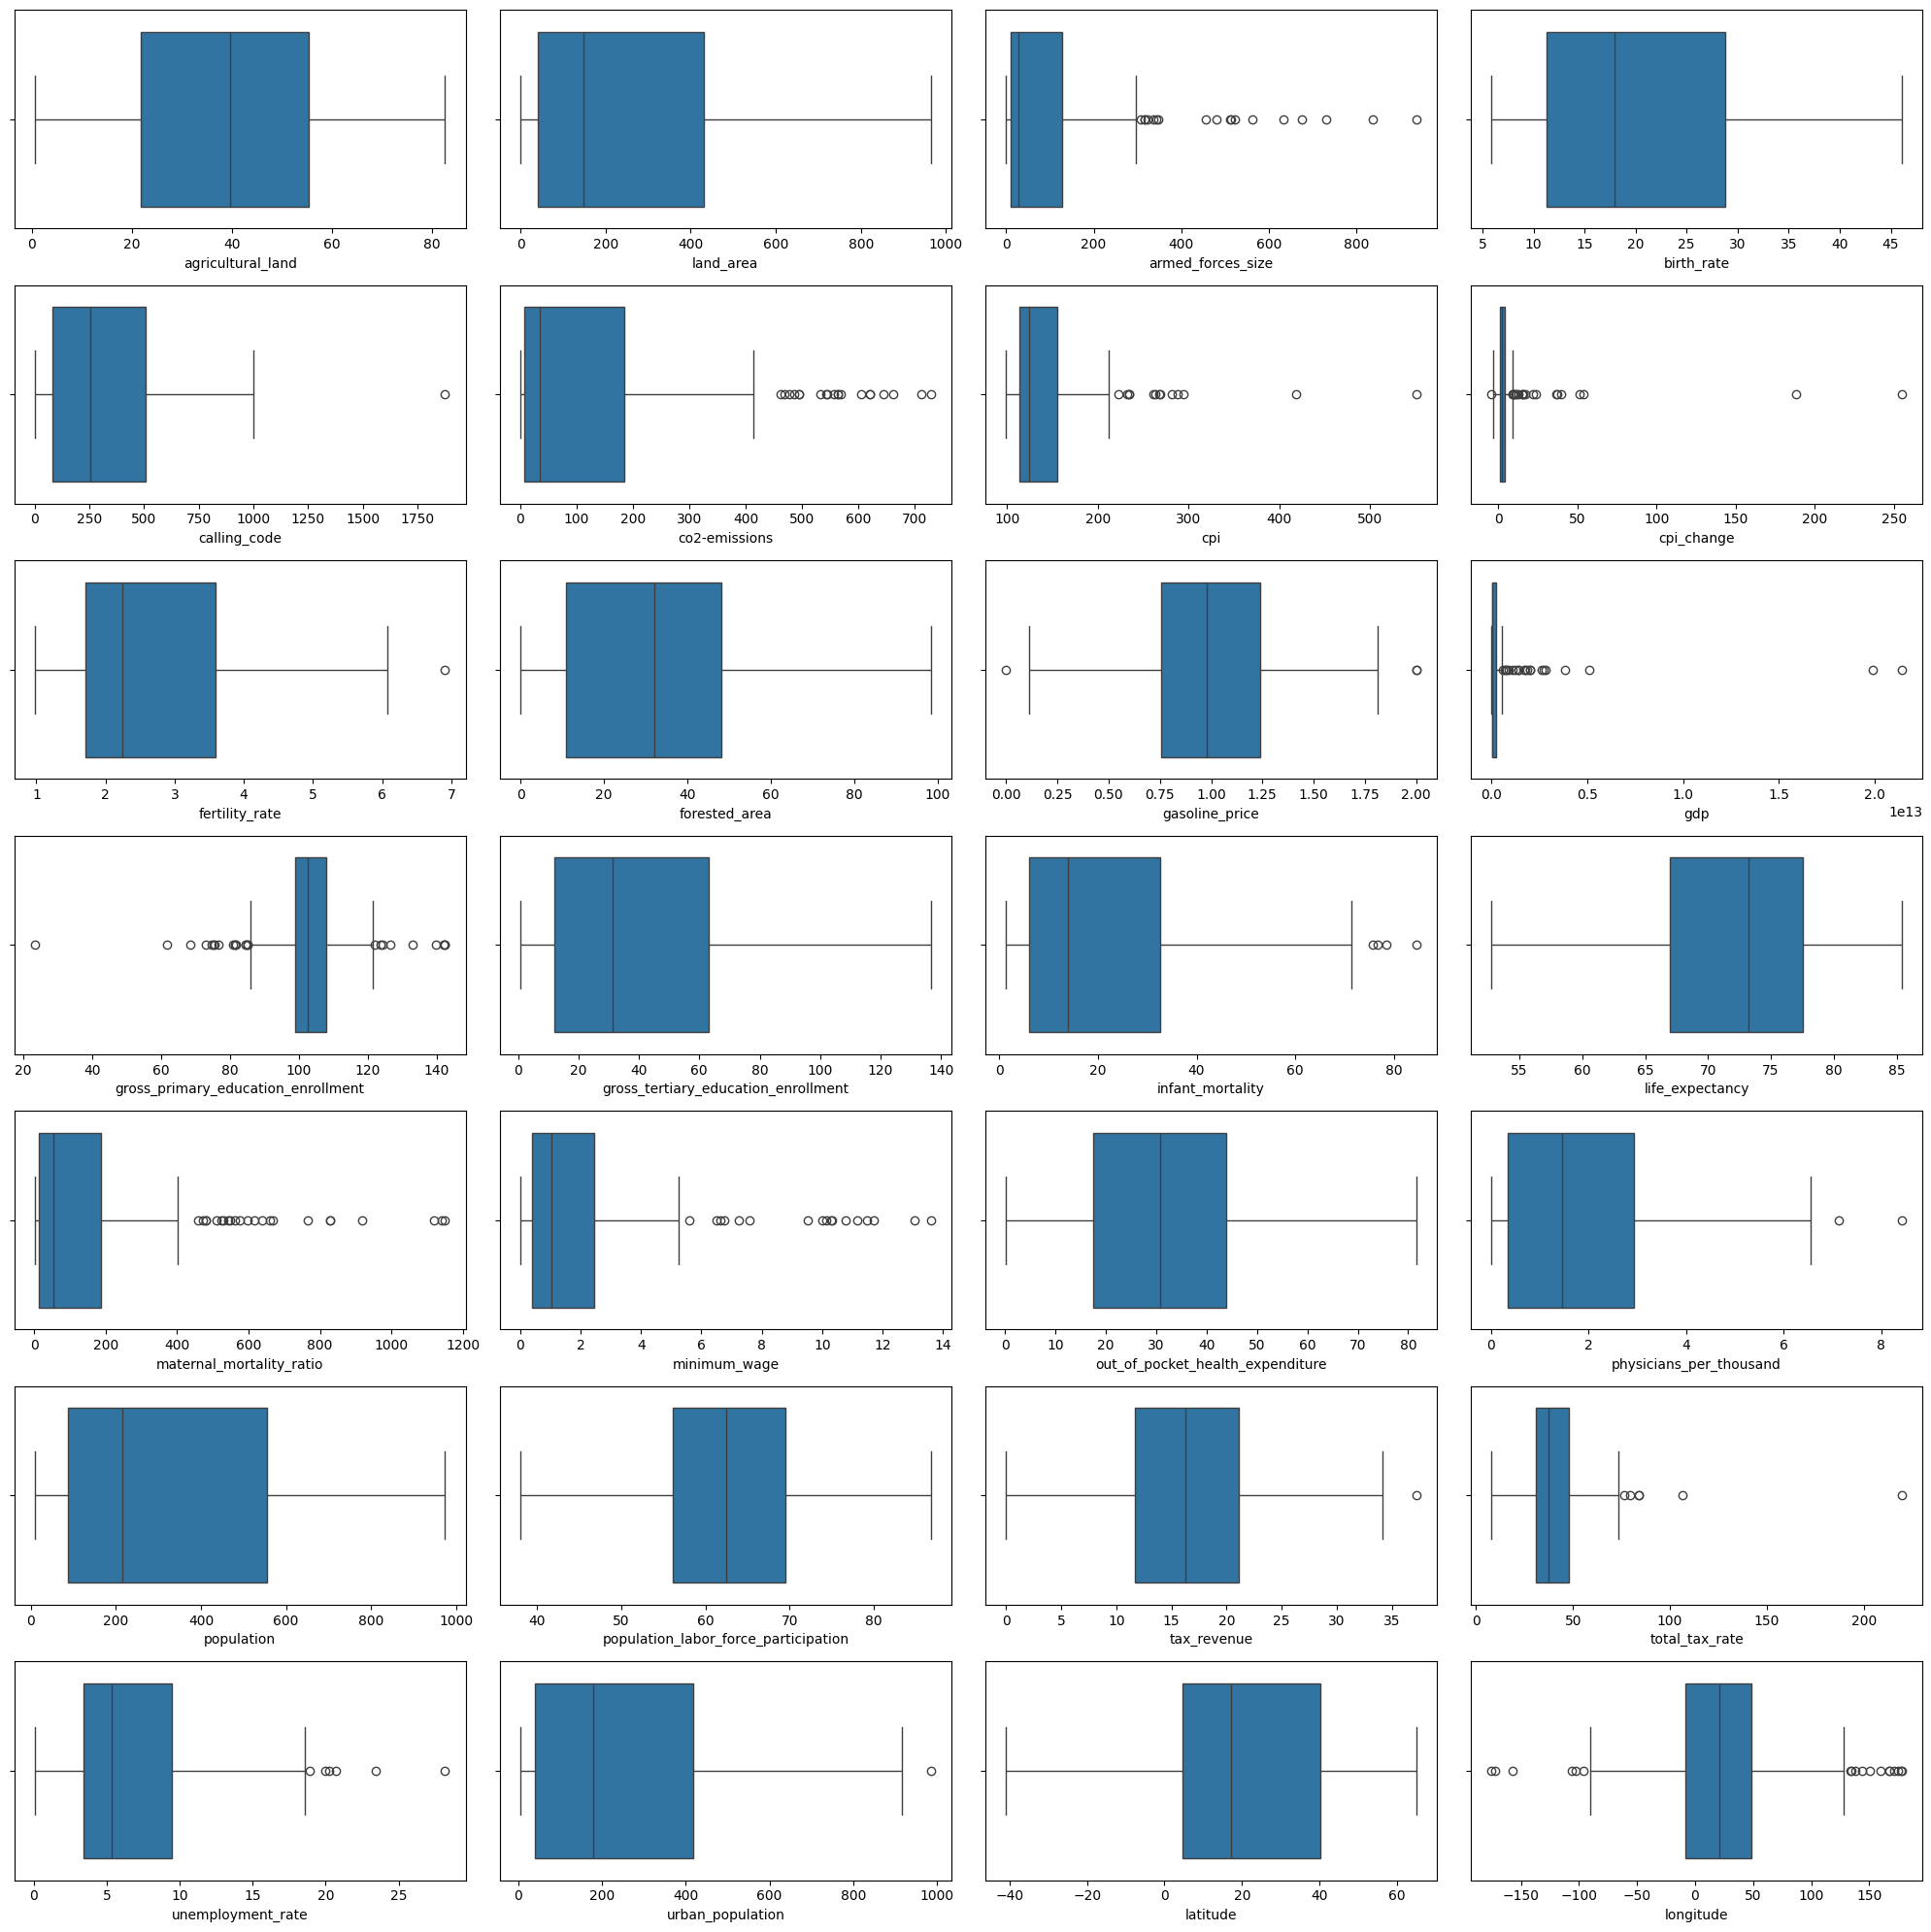

In [21]:
# lo siguiente que tendríamos que hacer es ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
 
fig, axes = plt.subplots(nrows = 7, ncols = 4, figsize = (20, 20)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[ :, :]);

In [25]:
mediana_media = ['agricultural_land', 'birth_rate','calling_code', 'forested_area', 'gross_tertiary_education_enrollment', 'life_expectancy', 'out_of_pocket_health_expenditure', 'population_labor_force_participation', 'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude']

for columna in mediana_media:
   
   media = df[columna].mean()
   mediana = df[columna].median()
   print(f"Columna: {columna} ---->    Media: {media:.2f}, Mediana: {mediana:.2f}")  

Columna: agricultural_land ---->    Media: 39.12, Mediana: 39.60
Columna: birth_rate ---->    Media: 20.21, Mediana: 17.95
Columna: calling_code ---->    Media: 360.55, Mediana: 255.50
Columna: forested_area ---->    Media: 32.02, Mediana: 32.00
Columna: gross_tertiary_education_enrollment ---->    Media: 37.96, Mediana: 31.20
Columna: life_expectancy ---->    Media: 72.28, Mediana: 73.20
Columna: out_of_pocket_health_expenditure ---->    Media: 32.64, Mediana: 30.70
Columna: population_labor_force_participation ---->    Media: 62.74, Mediana: 62.45
Columna: total_tax_rate ---->    Media: 40.82, Mediana: 37.20
Columna: unemployment_rate ---->    Media: 6.89, Mediana: 5.36
Columna: urban_population ---->    Media: 279.46, Mediana: 179.04
Columna: latitude ---->    Media: 19.09, Mediana: 17.27
